In [3]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path
import json 

%load_ext autoreload
%autoreload 2

from utils.plot import (plot_all_prices, 
                        plot_bb, 
                        plot_multiple_lines, 
                        plot_macd)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [126]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (30, 10)


stock_dir_path = str(Path(os.path.abspath('')) / 'data/stock_data/')
tickers_path = str(Path(os.path.abspath('')) / 'data/stocksTickers.json')
reddit_path = str(Path(os.path.abspath('')) / 'data/reddit_data/')
game_names_1_path = str(Path(os.path.abspath('')) / 'data/game_names.json')
game_names_2_path = str(Path(os.path.abspath('')) / 'data/game_names_2.json')

def load_all_stocks_data(stock_path=stock_dir_path):
    data_dict = {}
    for filename in os.listdir(stock_path): 
        try: 
            data_dict[filename.split('.')[0]] = pd.read_csv(str(Path(stock_path) / filename)).drop(columns='Unnamed: 0')

        except KeyError:
            data_dict[filename.split('.')[0]] = pd.read_csv(str(Path(stock_path) / filename))
            
    return data_dict

data_dict = load_all_stocks_data() 
main_stock_names = ['electronic arts', 'blizzard', 'take-two', 'ubisoft']
main_stock_dict = {key: data_dict[key] for key in main_stock_names }
ea = data_dict['electronic arts']
blizzard = data_dict['blizzard']
take_two = data_dict['take-two']
ubisoft = data_dict['ubisoft']

with open(game_names_1_path) as game_names_file_1:
    game_names_1 = json.load(game_names_file_1)

with open(game_names_2_path) as game_names_file_2:
    game_names_2 = json.load(game_names_file_2)

reddit_dict = load_all_stocks_data(reddit_path)
    
df = pd.read_csv(str(Path(os.path.abspath('')) / 'data/blizzard.csv')).drop(columns='Unnamed: 0')

# Gaming industry stock price prediction using BERT and GAN
# 1. Stock Data
## 1.1 Origin of the data
Data comes from yahoo finance python API

## 1.2 Chosen companies: 
 ### 1. Electronic Arts
 ### 2. UBISOFT
 ### 3. TAKE-TWO
 ### 4. BLIZZARD <br>

## 1.3 Selected time period:
### 2018-12-11 - 2021-12-10

## 1.4 Stock data exploration

In [127]:
blizzard

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-12-11,47.637469,47.921902,46.803791,47.274574,12474126,0.0,0
1,2018-12-12,48.108254,49.255792,47.490349,47.519775,11453591,0.0,0
2,2018-12-13,47.814015,48.314221,46.804772,47.578621,7755190,0.0,0
3,2018-12-14,46.558591,47.519775,46.068191,46.833214,7161356,0.0,0
4,2018-12-17,46.686096,47.490351,45.744528,46.176083,10064952,0.0,0
...,...,...,...,...,...,...,...,...
752,2021-12-06,57.529999,58.450001,57.240002,58.090000,9408963,0.0,0
753,2021-12-07,58.919998,59.270000,58.282001,58.770000,11553517,0.0,0
754,2021-12-08,58.779999,60.009998,58.029999,59.270000,9785536,0.0,0
755,2021-12-09,58.595001,59.810001,58.520000,59.070000,8402308,0.0,0


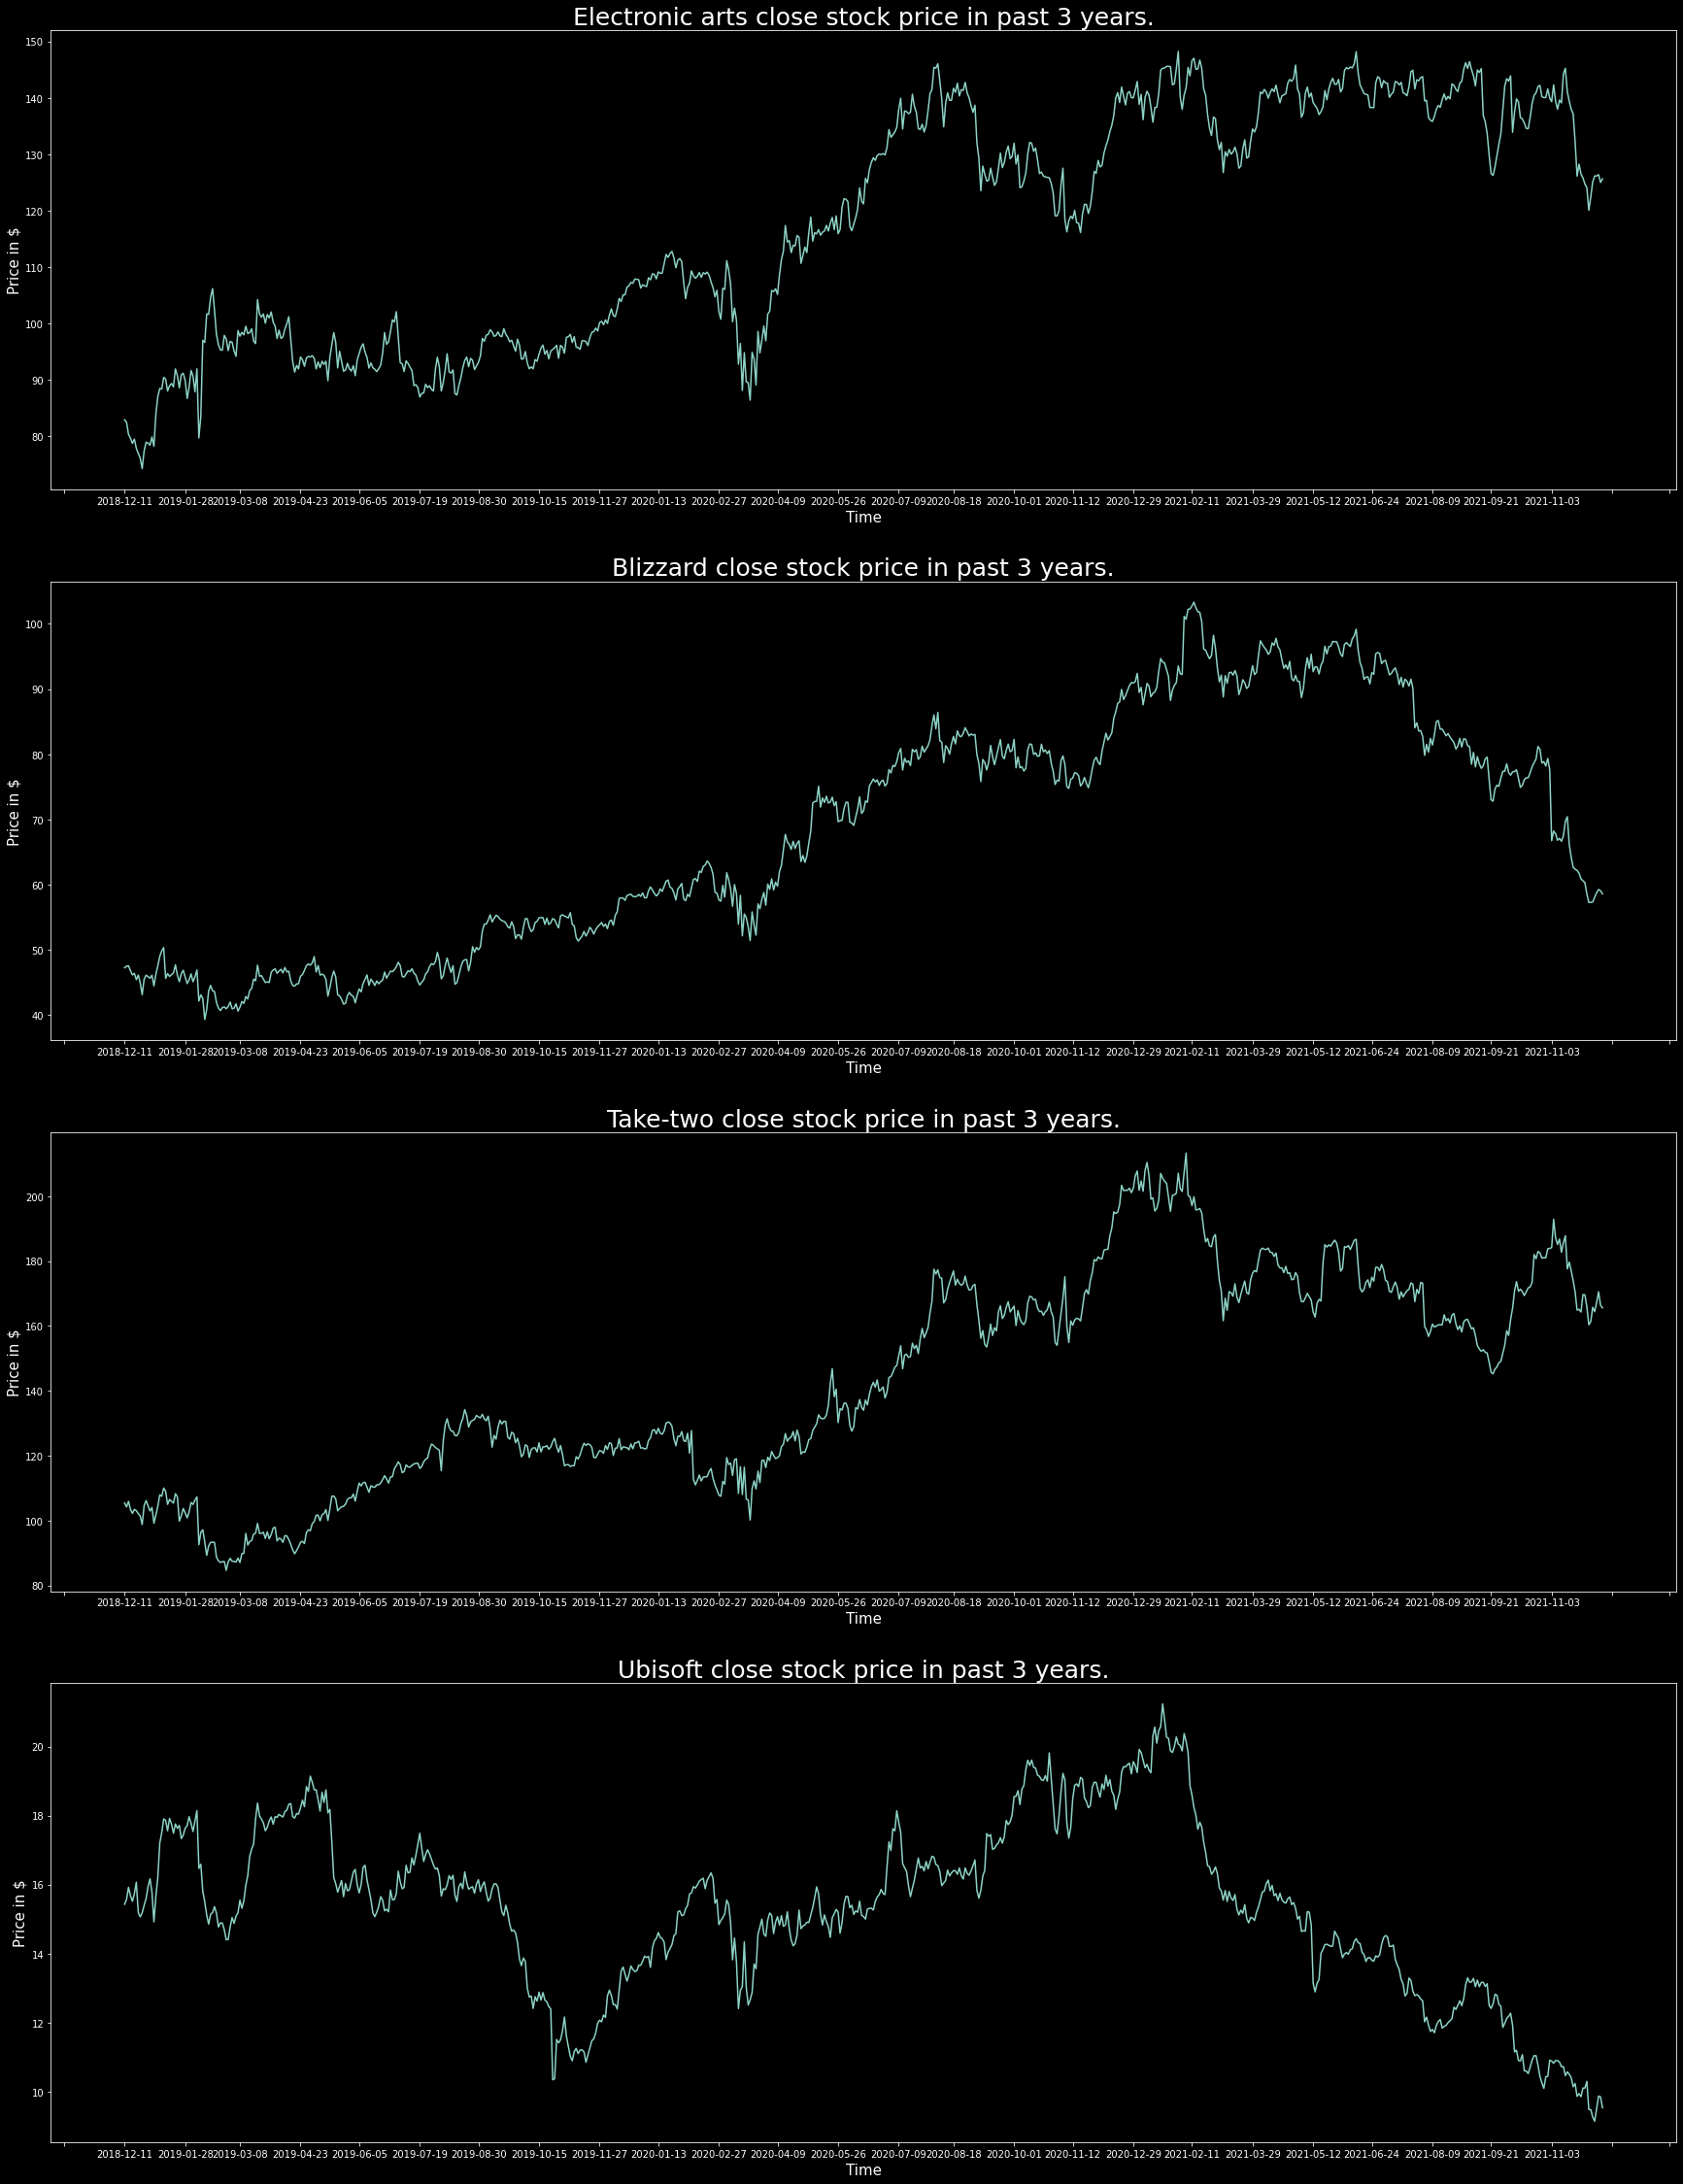

In [128]:
plot_all_prices(main_stock_dict, 'Date', 'Close', [30, 10])


## 1.5 Chosen ETF-s
  ### 1. Global X Video Games & Esports ETF
  ### 2. VanEck Vectors Video Gaming and eSports
  ### 3. Roundhill BITKRAFT Esports & Digital Entertainment ETF


# 2 Technical analysis 
## 2.1 Simple moving averages

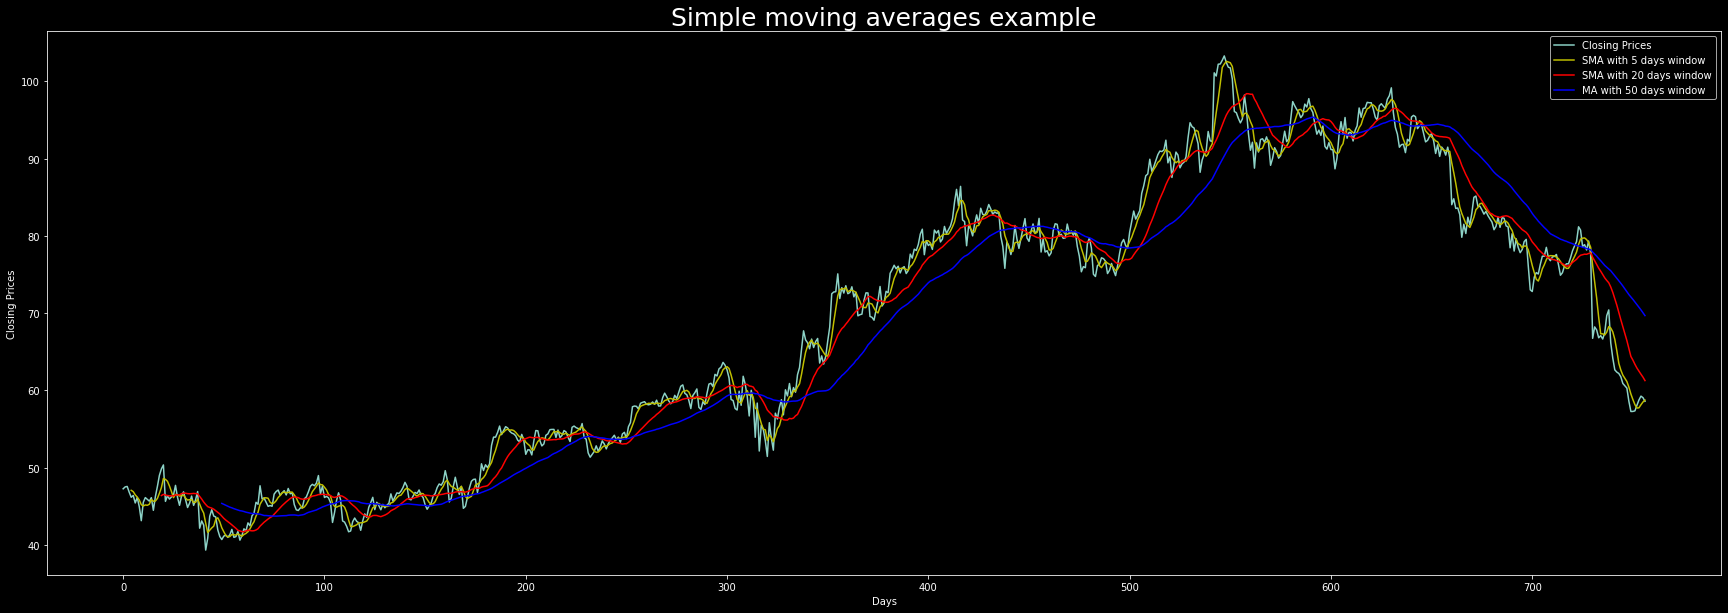

In [129]:
plot_multiple_lines(
    'Simple moving averages example', 
    df['Close'], 
    [
        (df['sma_5'], 'SMA with 5 days window', 'y'), 
        (df['sma_20'], 'SMA with 20 days window', 'r'), 
        (df['sma_50'], 'MA with 50 days window', 'b')
    ]
)

## 2.2 Exponential moving averages

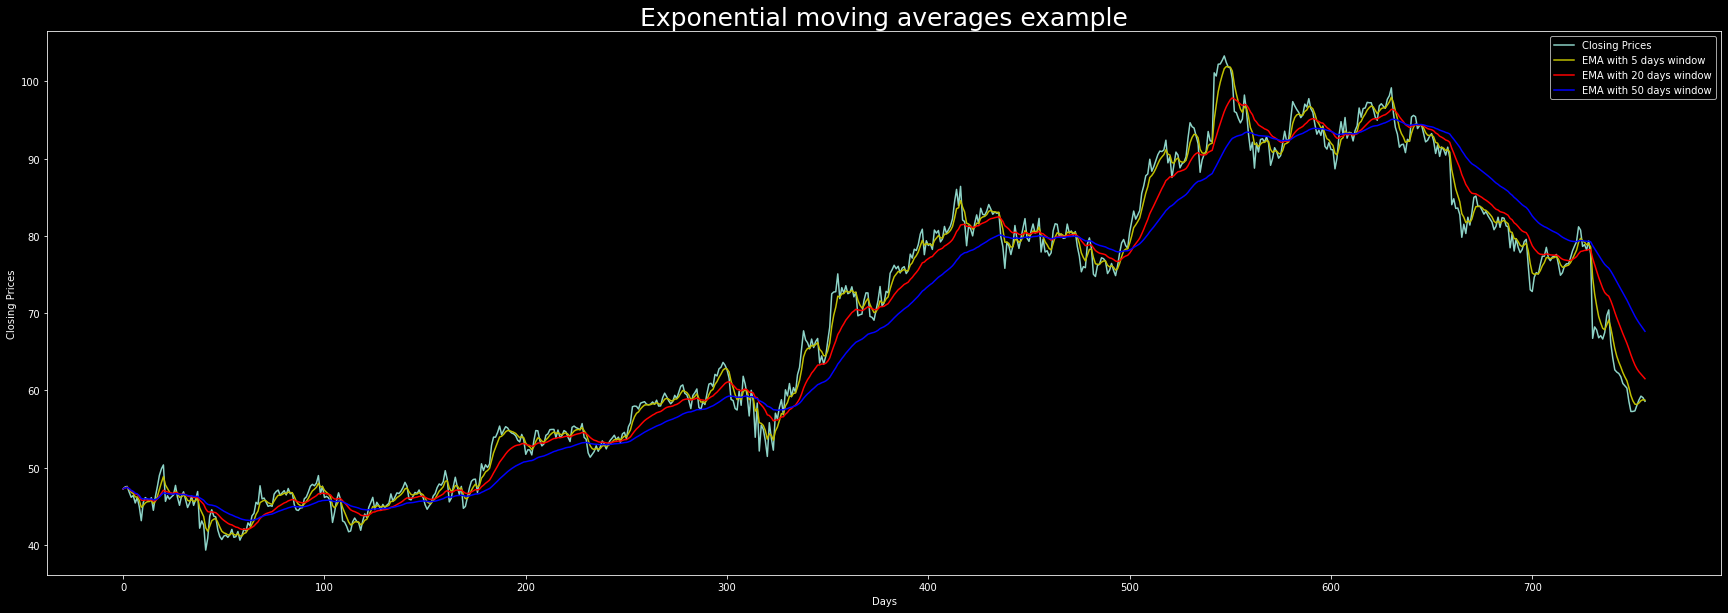

In [130]:
plot_multiple_lines(
    'Exponential moving averages example', 
    df['Close'], 
    [
        (df['ema_5'], 'EMA with 5 days window', 'y'), 
        (df['ema_20'], 'EMA with 20 days window', 'r'), 
        (df['ema_50'], 'EMA with 50 days window', 'b')
    ]
)

## 2.3 Weighted moving averages

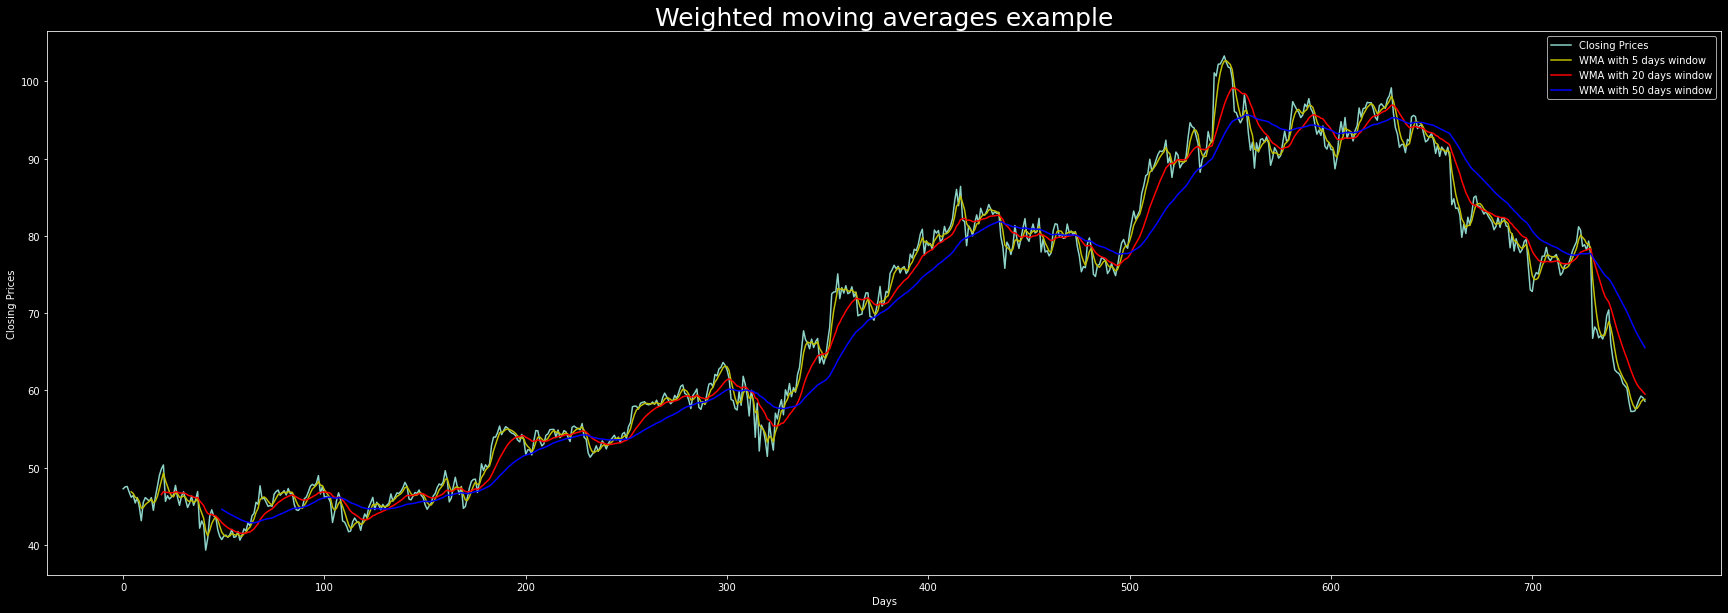

In [131]:
plot_multiple_lines(
    'Weighted moving averages example', 
    df['Close'], 
    [
        (df['wma_5'], 'WMA with 5 days window', 'y'), 
        (df['wma_20'], 'WMA with 20 days window', 'r'), 
        (df['wma_50'], 'WMA with 50 days window', 'b')
    ]
)

## 2.4 Bollinger Bands

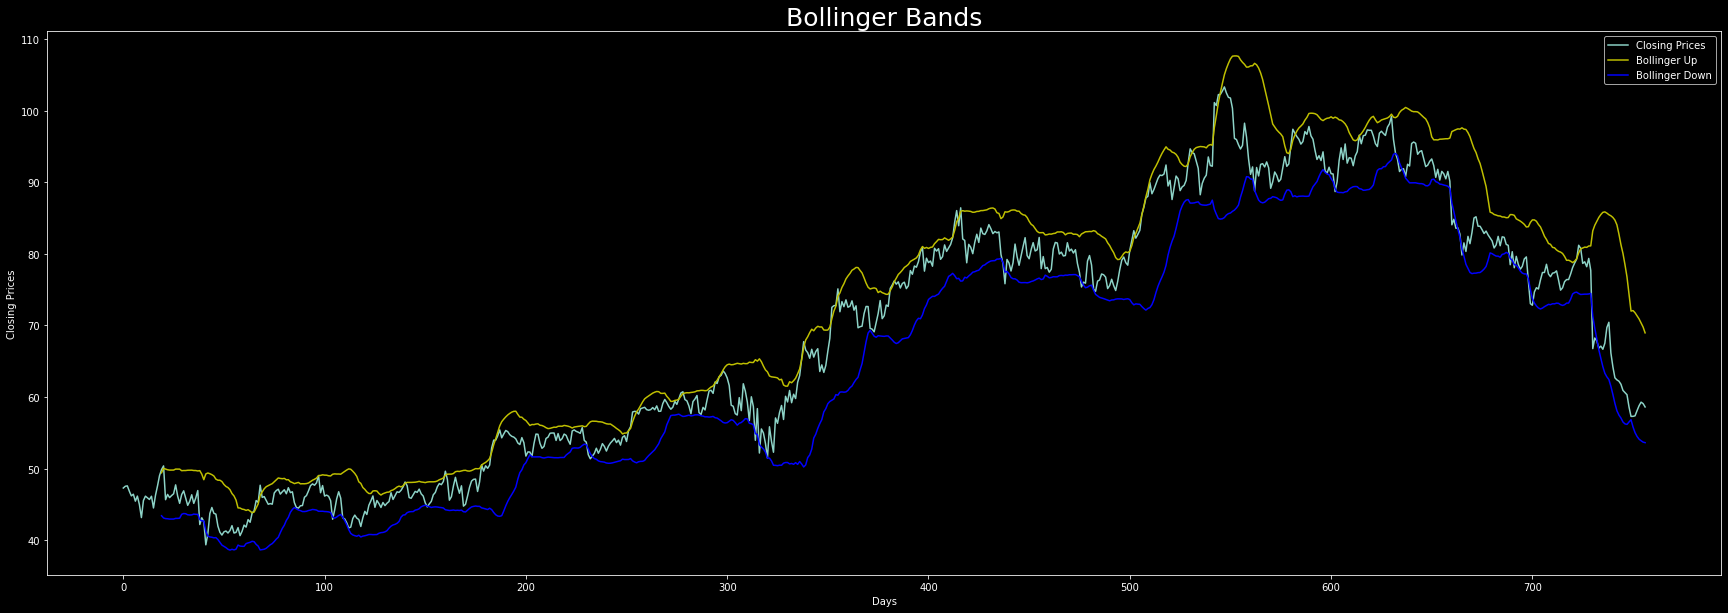

In [132]:
plot_bb(
    df['Close'], 
    df['bb_20_up'], 
    df['bb_20_down']
)

## 2.5 Moving average convergence/divergence (MACD)

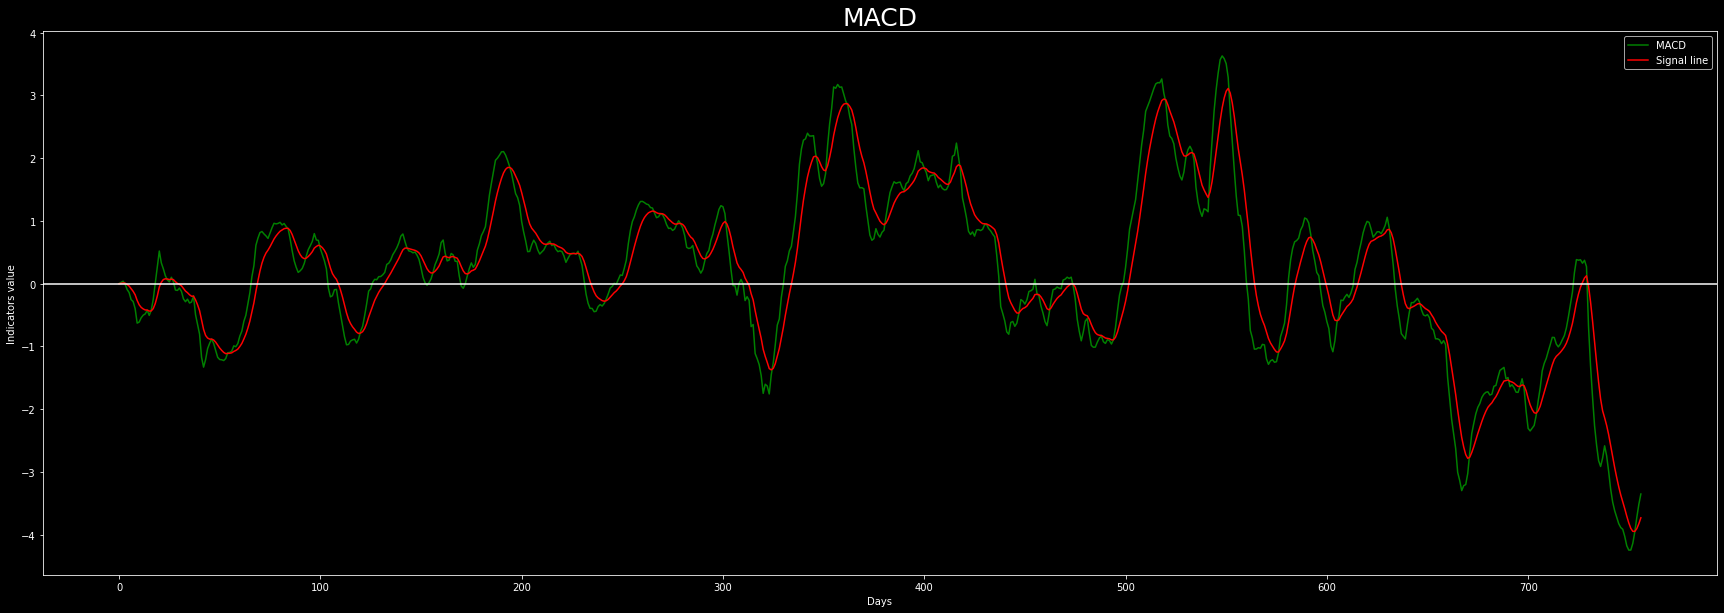

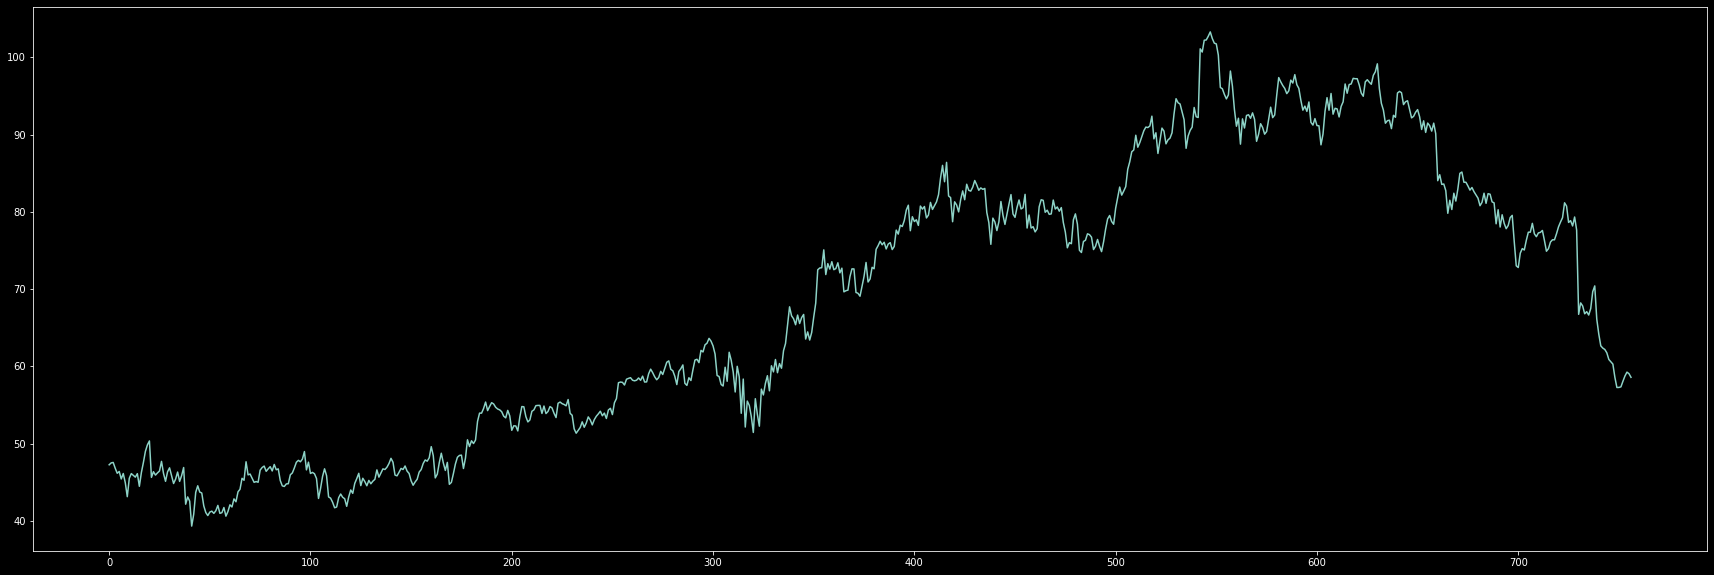

In [133]:
plot_macd(
    df['macd'], 
    df['signal']
)
plt.plot(df['Close'])
plt.show()

# 3 Choosing keywords for data scraping 

## 3.1 First approach - Scraping game names of chosen companies from wikipedia

In [134]:
game_names_1

{'ATVI': ['Blizzard',
  'Starcraft',
  'Warcraft',
  'Overwatch',
  'Diablo',
  'World of Warcraft',
  'Hearthstone',
  'Heroes of the Storm'],
 'UBSFY': ["Assassin's Creed Chronicles: China",
  'NCIS',
  "Tom Clancy's H.A.W.X 2",
  'Rayman Legends: Definitive Edition',
  'Rayman Mini',
  'Driver: San Francisco',
  "Assassin's Creed: Revelations",
  'Anno 2070',
  'Prince of Persia Classic',
  'Imagine: Fashion Life',
  'The Hollywood Squares',
  'The Black Eyed Peas Experience',
  'Red Steel 2',
  'Rabbids Big Bang',
  'From Dust',
  'Rabbids Crazy Rush',
  'Rabbids Invasion: The Interactive TV Show',
  'Jeopardy!',
  'Rocksmith: All-new 2014 Edition - Remastered',
  'Far Cry New Dawn',
  'Flashback',
  'Battle of Giants: Dinosaurs - Fight for Survival',
  'Funky Barn 3D',
  'The Smurfs 2',
  "Gold's Gym Dance Workout",
  'Trials Frontier',
  'Mario + Rabbids Kingdom Battle',
  'Silent Hunter 5: Battle of the Atlantic',
  'Hungry Shark: World',
  'Just Dance 2',
  'Spartacus Legends',

In [135]:
count = 0 
for value in game_names_1.values(): 
    count += len(value)

count

938

# 3.2 Second approach - Manual selection of most popular games

In [136]:
game_names_2

{'EA': ['EA',
  'Fifa',
  'The Sims',
  'Need for Speed',
  'NFL',
  'Apex',
  'Battlefield',
  'Bejeweled',
  'Battlefront',
  'NBA',
  'Dragon Age',
  'Titanfall',
  'Dead Space'],
 'TTWO': ['Take Two',
  'NBA 2K',
  'Battleborn',
  'BioShock',
  'Borderlands',
  'Evolve',
  'Mafia',
  'Civilization',
  'The Darkness',
  'XCOM',
  'WWE',
  'GTA',
  'Grand Theft Auto',
  'Max Payne',
  'Red Dead Redemption',
  'RRD'],
 'UBSFY': ['Ubisoft',
  "Assasin's Creed",
  'AC',
  'Far Cry',
  'Watch Dogs',
  'Rainbow Six Siege',
  'Wildlands',
  'For Honor',
  "Tom Clancy's",
  'The Division'],
 'ATVI': ['Blizzard',
  'Starcraft',
  'Warcraft',
  'Overwatch',
  'Diablo',
  'World of Warcraft',
  'Hearthstone',
  'Heroes of the Storm']}

In [137]:
count = 0 
for value in game_names_2.values(): 
    count += len(value)

count

47

# 4. Reddit text data scraping

In [138]:
reddit_dict['ATVI']

,author,body,created_utc,score,created,game_name
0,Bens_Dream,This doesn't sound like an issue with Blizzard...,1547031922,1,1.547028e+09,Blizzard
1,jollysaintnick88,Is everyone forgetting that Blizzard just anno...,1547034233,1,1.547031e+09,Blizzard
2,McManus26,Blizzard is the villain of the moment because ...,1547036254,1,1.547033e+09,Blizzard
3,frbap,While I hope it isn't true it wouldn't surpris...,1547037382,1,1.547034e+09,Blizzard
4,Zelun,I'm not saying this guy is lying or anything l...,1547040421,1,1.547037e+09,Blizzard
...,...,...,...,...,...,...
71564,MrManicMarty,"I tried two games today, both ones I got on Ep...",1637534524,6,1.637531e+09,Heroes of the Storm
71565,Sarasin,It is also easier to remember the misses becau...,1637379275,4,1.637376e+09,Heroes of the Storm
71566,fkurgdmidtbrn,"Change that to ""most game players,"" lmao, it w...",1637279188,4,1.637276e+09,Heroes of the Storm
71567,Smart_Ass_Dave,I have been AFK timer-ed only one time in my g...,1637267144,2,1.637264e+09,Heroes of the Storm


In [140]:
reddit_dict['TTWO']

,author,body,created_utc,score,created,game_name
0,JustinHopewell,Neither does anyone's comments or wishes.\n\nS...,1547060916,1,1.547057e+09,Take Two
1,belgarionx,I don't care about Epic store since they can f...,1547063267,1,1.547060e+09,Take Two
2,cowbeef01,"&gt;It plays tediously slowly, you can't skip ...",1546501359,1,1.546498e+09,Take Two
3,we_are_sex_bobomb,It’s also literally two different modes of pla...,1546609292,1,1.546606e+09,Take Two
4,gamelord12,One man's trash is another man's treasure. I ...,1546615505,1,1.546612e+09,Take Two
...,...,...,...,...,...,...
100183,-ImJustSaiyan-,They literally just put out Red Dead Redemptio...,1636760170,1,1.636757e+09,Red Dead Redemption
100184,-ImJustSaiyan-,It's moreso the fact that games take longer to...,1636657299,1,1.636654e+09,Red Dead Redemption
100185,A_Hard_Goodbye,I’ve refunded my copy and preordered Elden Rin...,1636701444,1,1.636698e+09,Red Dead Redemption
100186,Kurtz_Angle,"Watch GTA VI have a huge budget, incredibly de...",1636687405,1,1.636684e+09,Red Dead Redemption


In [141]:
reddit_dict['UBSFY']

,author,body,created_utc,score,created,game_name
0,Marvellaneous,I have a theory that Ubisoft might've went wit...,1547054214,1,1.547051e+09,Ubisoft
1,duke82722009,Holy shit. Ubisoft jumping over to Epic's stor...,1547054348,1,1.547051e+09,Ubisoft
2,CrouchingPuma,This is huge. A gigantic publisher like Ubisof...,1547054777,1,1.547051e+09,Ubisoft
3,Senpaiuer,This is worse than most exclusives on consoles...,1547055149,1,1.547052e+09,Ubisoft
4,Jamcram,is this an exclusivity contract? ubisoft proba...,1547055198,1,1.547052e+09,Ubisoft
...,...,...,...,...,...,...
71224,mak6453,Having health and showing health are different...,1636677504,-3,1.636674e+09,The Division
71225,Pulp_NonFiction44,Boxing is definitely making a return in the pu...,1636564763,34,1.636561e+09,The Division
71226,MigratingPidgeon,"To be honest, what pisses me off about the rec...",1636660920,7,1.636657e+09,The Division
71227,DarkChen,&gt;Like ubisoft is really bad by this.\n\nI a...,1636565566,5,1.636562e+09,The Division


# 5. Next steps: 
    - Perform sentiment analysis on reddit dataset using BERT model 
    - Add Covid measurment 
    - Add more Technical Indicators
    - Explore GAN